In [1]:
# Import dependencies
from pathlib import Path 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import & Inspect the Data

In [2]:
# Mount to Google Drive (for use with GoogleCoLab)
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# Loading data
tornado_df = pd.read_csv("gdrive/My Drive/Colab Notebooks/Tornadoes Machine Learning & Analysis/Cleaned_Data/1950-2020_tornadoes_cleaned.csv")
tornado_df

,Year,Month,Day,Timestamp,State,State_Fips,County_Fips,Start_Lat,Start_Lon,End_Lat,End_Lon,EF,Injuries,Fatalities,Loss,Crop_Loss,Length,Width
0,1950,10,1,1950-10-01 21:00:00,OK,40,25,36.7300,-102.5200,36.8800,-102.3000,1,0,0,4000000.0,NaN,15.80,10
1,1950,10,9,1950-10-09 02:15:00,NC,37,47,34.1700,-78.6000,0.0000,0.0000,3,3,0,5000000.0,NaN,2.00,880
2,1950,11,20,1950-11-20 02:20:00,KY,21,177,37.3700,-87.2000,0.0000,0.0000,2,0,0,5000000.0,NaN,0.10,10
3,1950,11,20,1950-11-20 04:00:00,KY,21,209,38.2000,-84.5000,0.0000,0.0000,1,0,0,5000000.0,NaN,0.10,10
4,1950,11,20,1950-11-20 07:30:00,MS,28,101,32.4200,-89.1300,0.0000,0.0000,1,3,0,4000000.0,NaN,2.00,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67019,2020,9,1,2020-09-01 16:24:00,TN,47,95,36.3290,-89.4981,36.3517,-89.4729,0,0,0,NaN,2000.0,2.10,50
67020,2020,9,3,2020-09-03 15:57:00,MD,24,3,38.9480,-76.5695,38.9233,-76.4615,0,0,0,1250000.0,NaN,6.05,100
67021,2020,9,5,2020-09-05 16:17:00,CA,6,39,37.3500,-119.3400,37.5218,-119.3056,2,0,0,NaN,NaN,12.02,50
67022,2020,9,5,2020-09-05 18:29:00,CA,6,19,37.2500,-119.2000,37.2598,-119.1838,1,0,0,NaN,NaN,1.12,25


In [4]:
# # Loading data
# file_path = Path("../Cleaned_Data/1950-2020_tornadoes_cleaned.csv")
# tornado_df = pd.read_csv(file_path)

In [5]:
tornado_df.columns

Index(['Year', 'Month', 'Day', 'Timestamp', 'State', 'State_Fips',
       'County_Fips', 'Start_Lat', 'Start_Lon', 'End_Lat', 'End_Lon', 'EF',
       'Injuries', 'Fatalities', 'Loss', 'Crop_Loss', 'Length', 'Width'],
      dtype='object')

In [6]:
# drop na columns
tornado_df = tornado_df.dropna()
tornado_df

,Year,Month,Day,Timestamp,State,State_Fips,County_Fips,Start_Lat,Start_Lon,End_Lat,End_Lon,EF,Injuries,Fatalities,Loss,Crop_Loss,Length,Width
41903,2000,6,1,2000-06-01 17:06:00,WI,55,27,43.4000,-88.6300,43.3800,-88.3700,2,0,0,1110000.0,400000.0,17.00,120
49035,2006,12,31,2006-12-31 14:45:00,GA,13,93,32.2700,-83.7300,32.2700,-83.7300,2,1,0,150000.0,250000.0,0.46,50
50046,2007,10,18,2007-10-18 17:10:00,KY,21,59,37.8100,-87.0000,37.8900,-86.7700,2,0,0,200000.0,50000.0,13.93,200
50056,2007,10,18,2007-10-18 18:32:00,KY,21,149,37.6200,-87.4800,37.7200,-87.1800,2,4,0,900000.0,200000.0,17.26,360
50070,2007,10,18,2007-10-18 20:03:00,IN,18,19,38.4700,-85.5500,38.5100,-85.4800,3,0,0,1000000.0,10000.0,4.80,440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66897,2020,8,27,2020-08-27 17:45:00,AR,5,147,35.3051,-91.1835,35.3171,-91.2003,0,0,0,20000.0,5000.0,1.26,50
66918,2020,8,29,2020-08-29 15:26:00,NY,36,91,42.9390,-73.7000,42.9380,-73.6950,1,1,0,35000.0,20000.0,0.26,50
66919,2020,8,29,2020-08-29 15:42:00,NY,36,83,42.9160,-73.5950,42.8982,-73.5596,1,0,0,45000.0,30000.0,2.17,100
66971,2020,8,6,2020-08-06 14:02:00,VA,51,15,38.2210,-78.8770,38.2090,-78.8320,0,0,0,150000.0,100000.0,2.58,100


## Machine Learning

In [7]:
# Import Dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Random Forest -- feature importance

This algorithm takes inputs (Injuries,	Fatalities,	Loss,	Crop_Loss,	Length, &	Width) to predict EF Rating

#### 1. Define input data (X) and output data (y)

In [8]:
X = tornado_df.copy()
X = X.drop(['Year', 'Month', 'Day', 'Timestamp', 'State', 'State_Fips',
       'County_Fips', 'Start_Lat', 'Start_Lon', 'End_Lat', 'End_Lon', 'EF'], axis=1)
X

,Injuries,Fatalities,Loss,Crop_Loss,Length,Width
41903,0,0,1110000.0,400000.0,17.00,120
49035,1,0,150000.0,250000.0,0.46,50
50046,0,0,200000.0,50000.0,13.93,200
50056,4,0,900000.0,200000.0,17.26,360
50070,0,0,1000000.0,10000.0,4.80,440
...,...,...,...,...,...,...
66897,0,0,20000.0,5000.0,1.26,50
66918,1,0,35000.0,20000.0,0.26,50
66919,0,0,45000.0,30000.0,2.17,100
66971,0,0,150000.0,100000.0,2.58,100


In [9]:
y = tornado_df["EF"].ravel()
y[:10]

array([2, 2, 2, 2, 3, 1, 1, 2, 0, 2])

#### 2. Splitting into Train and Test sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### 3. Scale the input data (X)

In [11]:
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#### 4. Fitting the Random Forest Model

In [12]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [13]:
 # Fitting the model
model = rf_model.fit(X_train_scaled, y_train)

#### 5. Making Predictions Using Random Forest Model

In [14]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)
predictions

array([1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 0, 0, 0, 1, 1, 0, 4, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 0, 2, 1, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0,
       1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 2, 4, 1, 0, 1, 2, 0, 0, 2, 1, 1, 3, 1, 2,
       2, 0, 3, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 2, 0, 1, 3, 0, 1, 0, 1, 1, 1, 0])

#### 6. Model Evaluation

In [15]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1","Actual 2", "Actual 3","Actual 4"], columns=["Predicted 0", "Predicted 1", "Predicted 2", "Predicted 3","Predicted 4"]
)
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [16]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 0,29,22,0,0,0
Actual 1,8,56,8,0,0
Actual 2,0,14,19,0,0
Actual 3,0,0,6,2,0
Actual 4,0,0,1,2,2


Accuracy Score : 0.6390532544378699
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.57      0.66        51
           1       0.61      0.78      0.68        72
           2       0.56      0.58      0.57        33
           3       0.50      0.25      0.33         8
           4       1.00      0.40      0.57         5

    accuracy                           0.64       169
   macro avg       0.69      0.51      0.56       169
weighted avg       0.66      0.64      0.63       169



#### 7. Rank the Importance of Features

In [17]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_

In [18]:
# We can sort the features by their importance.
feature_sort = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
feature_sort

[(0.29625725938161734, 'Loss'),
 (0.22914277202192423, 'Width'),
 (0.2241158055758644, 'Length'),
 (0.16247594276520397, 'Crop_Loss'),
 (0.0721883387904665, 'Injuries'),
 (0.01581988146492348, 'Fatalities')]

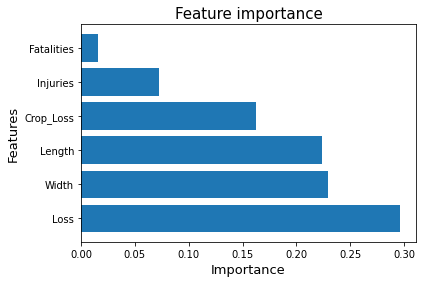

In [19]:
# Plot Feature Importance
features_sorted = []
importance_sorted = []

for i in feature_sort:
    features_sorted += [i[1]]
    importance_sorted += [i[0]]

plt.title("Feature importance", fontsize=15)
plt.xlabel("Importance", fontsize=13)
plt.ylabel("Features", fontsize=13)

plt.barh(range(len(importance_sorted)), importance_sorted,)
plt.yticks(range(len(importance_sorted)), features_sorted);